In [1]:
from pprint import pprint as print
import matplotlib.pyplot as plt

### i) Reading Data

In [2]:
lines = open('people.txt.csv').readlines()[1:]
table = [i.strip().split(',') for i in lines]

print(table)

[['21', 'adult', '6', 'single', '-1'],
 ['2', 'child', '3', 'married', '0'],
 ['18', 'adult', '5.7', 'married', '20'],
 ['221', 'elderly', '5', 'widow', '2'],
 ['34', 'child', '-7', 'married', '3']]


### ii) Create a ruleset E that contains rules to check:

1. 0<age<150
<br>
2. age > years_married
<br>
3. status $\epsilon$ {"single", "married", "widow"}
<br>
4. age<18       agegroup="child" <br>
   18<=age<65   agegroup="adult" <br>
   65<=age      agegroup="elderly"

In [3]:
def rule4(row):
    age, agegroup = int(row[0]), row[1]
    
    if age<18 and agegroup=="child":
        return True
    if age>=18 and age<65 and agegroup=="adult":
        return True
    if age>=65 and agegroup=="elderly":
        return True
    return False

rules = [ lambda x: True if int(x[0])>0 and int(x[0])<150 else False, # 0<Age<150
          lambda x: True if x[0]>x[4] else False,                      # Age > Years_married
          lambda x: True if x[3] in ["single", "married", "widow"] else False,
          rule4
        ]

### iii) Checking Rule Voilation

In [4]:
rules_voilation_count = [0 for i in range(5)]

for index, rule in enumerate(rules):
    for row in table:
        
        if not rule(row):
            rules_voilation_count[index] += 1

print(rules_voilation_count)

[1, 1, 0, 1, 0]


### iv) and v) Summary and Visualization

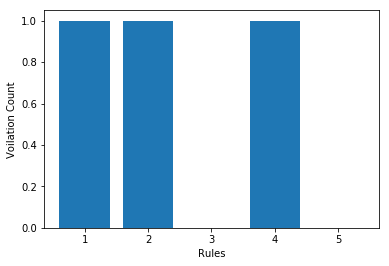

In [5]:
x = list(range(1,6))
y = rules_voilation_count


plt.bar(x,y)

plt.xlabel("Rules")
plt.ylabel("Voilation Count");